In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('ggplot')

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt') # for tokenization
nltk.download('averaged_perceptron_tagger') # for token tagging
nltk.download('maxent_ne_chunker') # for token chunking
nltk.download('words')
nltk.download('vader_lexicon') # for VADER sentiment scoring

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andyb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\andyb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\andyb\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\andyb\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\andyb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# reading data
df = pd.read_csv('../sentiment analysis/input/Reviews.csv')
print(df.shape)
df = df.head(500) # since its a large dataset, we'll only scale up to the first 500 rows lng sah
print(df.shape)

(568454, 10)
(500, 10)


In [6]:
df.head() # shows the tabular overview of the data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Quick EDA (Exploratory Data Analysis)

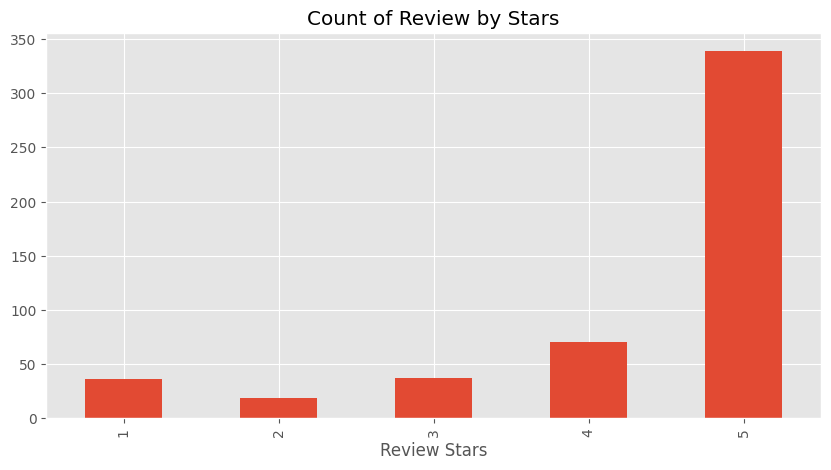

In [7]:
axis = df['Score'].value_counts().sort_index() \
.plot(kind = 'bar',
      title = 'Count of Review by Stars',
      figsize = (10, 5))
axis.set_xlabel('Review Stars')
plt.show()
# what this block is doing is it is is counting and sorting the reviews made in the 
# data set through the score column and placing it in a bar graph for proper analysis

# Basic NLTK Stuff

In [8]:
sample = df['Text'][50]
print(sample)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [9]:
tokens = nltk.word_tokenize(sample)
tokens[:10]
# what this does is it takes the text in sample and separates each word
# and places it into a list (see result for more clarity)
# NOTE: it also splits when punctuations are encountered such as `'`
# tokenizaing basically takes human texts and tokenizes it for the computer to understand

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]
# pos = part of speech tagging which have corresponding values
# reference: https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/13-POS-Keywords.html


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged) # chunks the given tokens
entities.pprint() # pretty print

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER Sentiment Scoring
- "bag of words" approach
- stop words are removed
- each word is scored and combined to a total score

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 


sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores('I am so depressed!')
# compound score is the aggregation between negative & positive
# we will be adjusting stuff like this for thesis since our polarity will be weighted
# differently (refer to paper)

{'neg': 0.66, 'neu': 0.34, 'pos': 0.0, 'compound': -0.5974}

In [14]:
sia.polarity_scores('OMG SHE SAID YES!!!')

{'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'compound': 0.5538}

In [15]:
sia.polarity_scores('bro...')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
sia.polarity_scores(sample)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [17]:
res = {} # a dictionary to store the results
# running a loop for the polarity score of the entire db
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
# printing the dictionary elements through pandas
vaders_res = pd.DataFrame(res).T # .T flips the table horizontally for a better view
vaders_res = vaders_res.reset_index().rename(columns = {'index':'Id'})
vaders_res = vaders_res.merge(df, how = 'left') # merging the new vaders data with the old dataframe

In [19]:
# so now the old df is merged with the vaders_res (common columns) na
vaders_res.head()
# the table below is now the sentiment scoring that was done through vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# VADERS Bar Plot

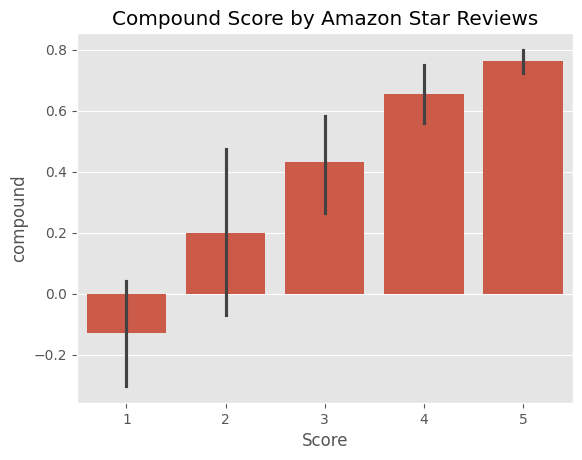

In [20]:
ax = sns.barplot(data = vaders_res, x = 'Score', y = 'compound')
ax.set_title("Compound Score by Amazon Star Reviews")
plt.show()

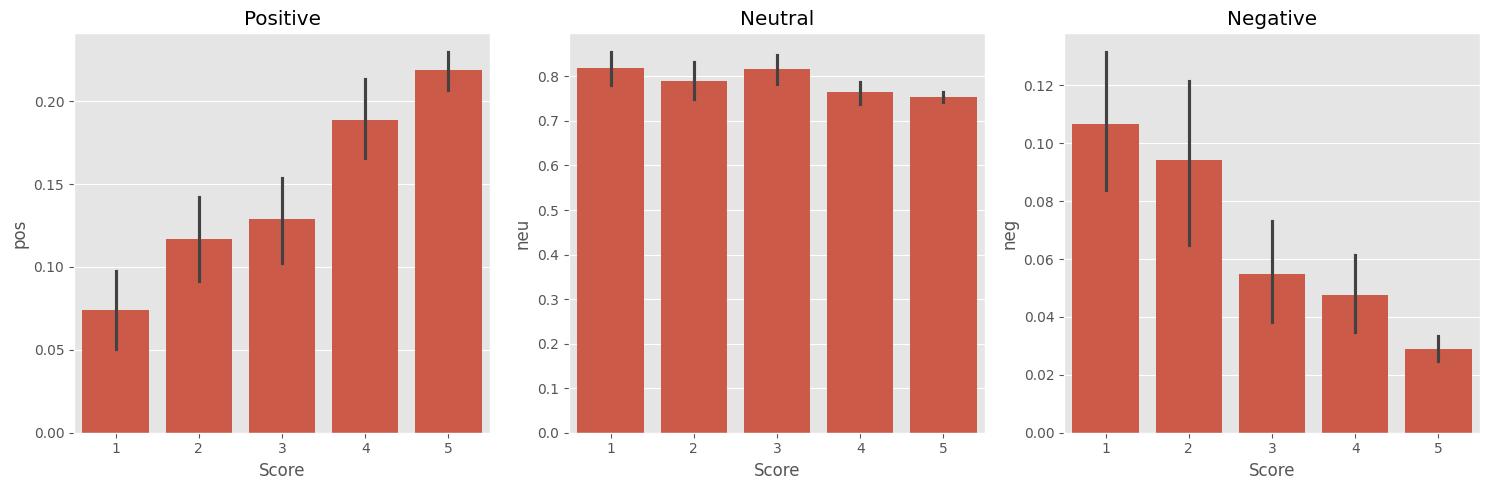

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data = vaders_res, x = 'Score', y = 'pos', ax=axs[0])
sns.barplot(data = vaders_res, x = 'Score', y = 'neu', ax=axs[1])
sns.barplot(data = vaders_res, x = 'Score', y = 'neg', ax=axs[2])
ax=axs[0].set_title('Positive')
ax=axs[1].set_title('Neutral')
ax=axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model
- uses a model trained of a large corpus of data
- transformer model accounts for the words but also the context related to other words

In [27]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" # a pretrained model for sentiment analysis provided by HuggingFace
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)